## OBP Prediction Project: Philadelphia Phillies

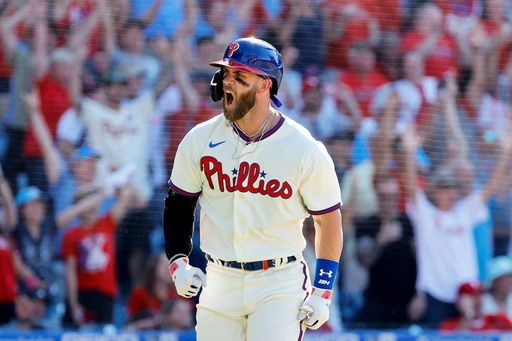

## Problem Defintion: Predict Full Season OBP based off of other variables from March and April

## 1. Import Libraries and acquire data

In [1]:
# Data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning and accuracy scores
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#check our target variable distribution
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

#other libraries
import math
import os

In [2]:
%pwd
os.chdir ('/Users/kylecamlic/Documents') #change working directory to the correct directory to analyze .csv files
%pwd

'/Users/kylecamlic/Documents'

In [3]:
batting_df = pd.read_csv('batting.csv')
batting_df.head()

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_OBP
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,36.1%,5.7%,40.0%,22.6%,66.0%,40.7%,81.1%,88.4%,86.0%,0.406
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,41.0%,11.8%,41.2%,27.9%,72.4%,44.8%,56.6%,87.8%,75.7%,0.429
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,33.3%,0.0%,22.2%,40.2%,74.5%,53.5%,54.3%,85.4%,71.1%,0.315
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,40.5%,0.0%,20.0%,27.3%,50.5%,37.3%,93.9%,97.8%,96.2%,0.353
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,51.9%,7.4%,29.6%,23.7%,48.8%,33.7%,66.1%,82.7%,75.7%,0.341


In [4]:
#Check the shape ofour data as well as get the column names

print(batting_df.shape)
batting_df.columns

(320, 29)


Index(['playerid', 'Name', 'Team', 'MarApr_PA', 'MarApr_AB', 'MarApr_H',
       'MarApr_HR', 'MarApr_R', 'MarApr_RBI', 'MarApr_SB', 'MarApr_BB%',
       'MarApr_K%', 'MarApr_ISO', 'MarApr_BABIP', 'MarApr_AVG', 'MarApr_OBP',
       'MarApr_SLG', 'MarApr_LD%', 'MarApr_GB%', 'MarApr_FB%', 'MarApr_IFFB%',
       'MarApr_HR/FB', 'MarApr_O-Swing%', 'MarApr_Z-Swing%', 'MarApr_Swing%',
       'MarApr_O-Contact%', 'MarApr_Z-Contact%', 'MarApr_Contact%',
       'FullSeason_OBP'],
      dtype='object')

In [5]:
#We always want to make sure that we have no null values in our data 
batting_df.isna().sum()

playerid             0
Name                 0
Team                 0
MarApr_PA            0
MarApr_AB            0
MarApr_H             0
MarApr_HR            0
MarApr_R             0
MarApr_RBI           0
MarApr_SB            0
MarApr_BB%           0
MarApr_K%            0
MarApr_ISO           0
MarApr_BABIP         0
MarApr_AVG           0
MarApr_OBP           0
MarApr_SLG           0
MarApr_LD%           0
MarApr_GB%           0
MarApr_FB%           0
MarApr_IFFB%         0
MarApr_HR/FB         0
MarApr_O-Swing%      0
MarApr_Z-Swing%      0
MarApr_Swing%        0
MarApr_O-Contact%    0
MarApr_Z-Contact%    0
MarApr_Contact%      0
FullSeason_OBP       0
dtype: int64

In [6]:
#We see that there are no null values and we want to check the data types
batting_df.dtypes

playerid               int64
Name                  object
Team                  object
MarApr_PA              int64
MarApr_AB              int64
MarApr_H               int64
MarApr_HR              int64
MarApr_R               int64
MarApr_RBI             int64
MarApr_SB              int64
MarApr_BB%            object
MarApr_K%             object
MarApr_ISO           float64
MarApr_BABIP         float64
MarApr_AVG           float64
MarApr_OBP           float64
MarApr_SLG           float64
MarApr_LD%            object
MarApr_GB%            object
MarApr_FB%            object
MarApr_IFFB%          object
MarApr_HR/FB          object
MarApr_O-Swing%       object
MarApr_Z-Swing%       object
MarApr_Swing%         object
MarApr_O-Contact%     object
MarApr_Z-Contact%     object
MarApr_Contact%       object
FullSeason_OBP       float64
dtype: object

In [7]:
#A lot of our % columns are objects and not optimal for modeling

#convert all object percentages to decimals and remove the '%' sign
cols = ['MarApr_BB%', 'MarApr_K%', 'MarApr_LD%', 'MarApr_GB%', 'MarApr_FB%', 'MarApr_IFFB%', 'MarApr_HR/FB', 'MarApr_O-Swing%', 'MarApr_Z-Swing%', 'MarApr_Swing%', 'MarApr_O-Contact%', 'MarApr_Z-Contact%', 'MarApr_Contact%']

  

In [8]:
#convert all object percentages to decimals and remove the '%' sign

for col in cols:
    batting_df[col] = batting_df[col].replace('%', '', regex=True)
    batting_df[col] = batting_df[col].astype('float') / 100.0

In [9]:
batting_df.dtypes

playerid               int64
Name                  object
Team                  object
MarApr_PA              int64
MarApr_AB              int64
MarApr_H               int64
MarApr_HR              int64
MarApr_R               int64
MarApr_RBI             int64
MarApr_SB              int64
MarApr_BB%           float64
MarApr_K%            float64
MarApr_ISO           float64
MarApr_BABIP         float64
MarApr_AVG           float64
MarApr_OBP           float64
MarApr_SLG           float64
MarApr_LD%           float64
MarApr_GB%           float64
MarApr_FB%           float64
MarApr_IFFB%         float64
MarApr_HR/FB         float64
MarApr_O-Swing%      float64
MarApr_Z-Swing%      float64
MarApr_Swing%        float64
MarApr_O-Contact%    float64
MarApr_Z-Contact%    float64
MarApr_Contact%      float64
FullSeason_OBP       float64
dtype: object

In [10]:
batting_df.head()

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_OBP
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,0.361,0.057,0.400,0.226,0.660,0.407,0.811,0.884,0.860,0.406
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,0.410,0.118,0.412,0.279,0.724,0.448,0.566,0.878,0.757,0.429
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,0.333,0.000,0.222,0.402,0.745,0.535,0.543,0.854,0.711,0.315
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,0.405,0.000,0.200,0.273,0.505,0.373,0.939,0.978,0.962,0.353
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,0.519,0.074,0.296,0.237,0.488,0.337,0.661,0.827,0.757,0.341


## 2. EDA

It is always good practice to know your data as best you can and we will be looking to get an idea of how our target variable, Full Season OBP, is distributed. 


In [11]:
y = batting_df['FullSeason_OBP']

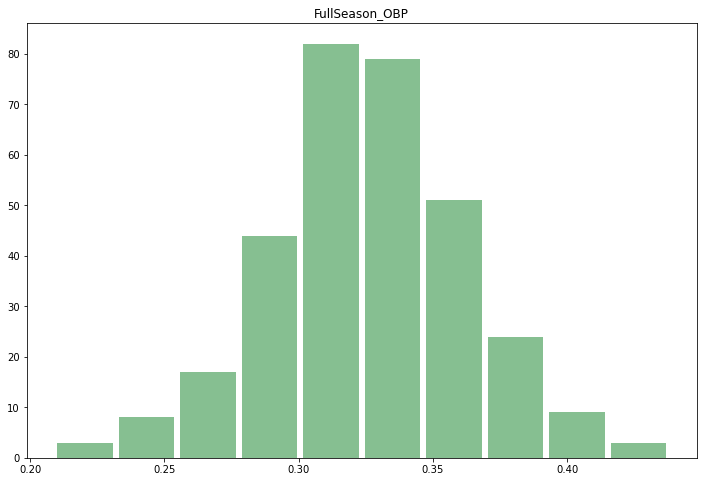

In [12]:
#create a histogram of our target variable to observe the high and low values in our data

ax = batting_df.hist(column='FullSeason_OBP', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

We see that between .200 and .250 is on the extreme low end of OBP and above .400 is on the very high end for OBP, which makes sense. 

Many algorithms such as linear regression assume that the data will follow a particular distribution, and if we neglect to look at our data we can get in trouble.

Knowing our variables distribution can helps us find the probability density function and asess the values our target variable is likely to take on. We can also see the likelihood that certain extreme values may occur. 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,699.019474,-160.915501,273.107718,inf,0.039572,0.682854
lognorm,713.189147,-155.555000,273.761178,inf,0.042859,0.583988
gamma,713.843502,-156.517623,274.054645,inf,0.045000,0.521346
norm,714.566207,-158.637706,268.610133,inf,0.042336,0.599591
beta,721.194517,-155.563336,283.101410,inf,0.049688,0.395447


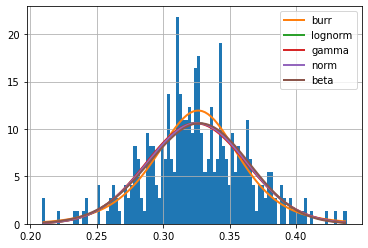

In [13]:
#set up our fitter with common distributions
f = Fitter(y,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()



In [14]:
#check which distribtuion most closely matches our data using 'sumsquare_error'
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 20.145826022577367,
  'd': 0.7208018143995771,
  'loc': -0.0498207970606524,
  'scale': 0.3846445278707986}}

Now, lets look that the relation between some variables in our data, and before I do this, I have some general opinions on the data that will impact what questions I start to answer first.

Of the predictor variables that we have there are some that are questionable when it comes to predicting Full Season OBP and I will run through these. It is important to note that more data is not always better, and can be noisy, which may lead to less accurate results. 

Data that plays no role at all: playerID, Name, Team 

Data that may not be very useful for predicting FullSeasonOBP: MarApr_PA, MarApr_AB, MarApr_SB, MarApr_IFFB%, MarApr_HR/FB. 
    
    
Variables like PA and At bats can be useful but really do not give us much information at all to be able to predict end of year OBP.

All they tell us is that, if he has a lot of PA, then he is clearly good enough to stay in the lineup.

To get a stolen Base you do obviously have to reach base, but once you reach base a stolen base is irrelevant to your OBP for that play. 

IFFB and HR/FB are very specific statistics that are most likely not going to hold the same weight as most other variables and may be noisy. 


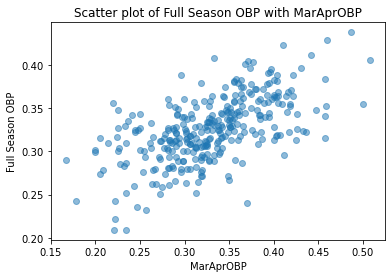

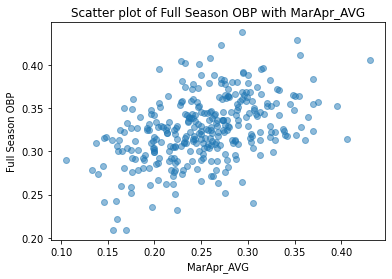

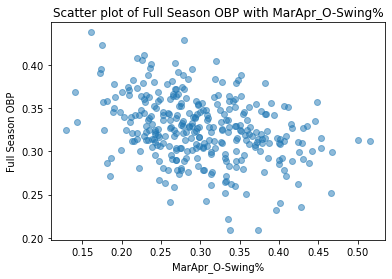

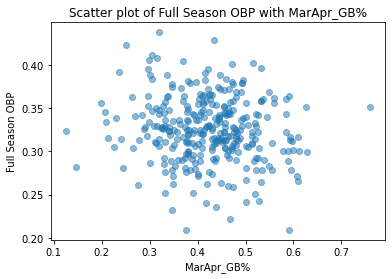

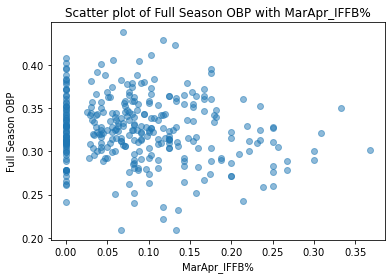

In [15]:
#We will make a scatter plot relating FullSeasonOBP with 'MarApr_OBP'

#how does MarApr_OBP impact FullSeasonOBP?
plt.scatter(batting_df['MarApr_OBP'], y, alpha=0.5)
plt.title('Scatter plot of Full Season OBP with MarAprOBP')
plt.xlabel('MarAprOBP')
plt.ylabel('Full Season OBP')
plt.show()

#how does MarApr_AVG impact FullSeasonOBP?
plt.scatter(batting_df['MarApr_AVG'], y, alpha=0.5)
plt.title('Scatter plot of Full Season OBP with MarApr_AVG')
plt.xlabel('MarApr_AVG')
plt.ylabel('Full Season OBP')
plt.show()

#how does MarApr_O-Swing% impact FullSeasonOBP?
plt.scatter(batting_df['MarApr_O-Swing%'], y, alpha=0.5)
plt.title('Scatter plot of Full Season OBP with MarApr_O-Swing%')
plt.xlabel('MarApr_O-Swing%')
plt.ylabel('Full Season OBP')
plt.show()

#how does MarApr_GB% impact FullSeasonOBP?
plt.scatter(batting_df['MarApr_GB%'], y, alpha=0.5)
plt.title('Scatter plot of Full Season OBP with MarApr_GB%')
plt.xlabel('MarApr_GB%')
plt.ylabel('Full Season OBP')
plt.show()

#how does MarApr_IFFB% impact FullSeasonOBP?
plt.scatter(batting_df['MarApr_IFFB%'], y, alpha=0.5)
plt.title('Scatter plot of Full Season OBP with MarApr_IFFB%')
plt.xlabel('MarApr_IFFB%')
plt.ylabel('Full Season OBP')
plt.show()

Analyzing our scatter plot results:

A) We see that, as expected MarApr_OBP and MarApr_AVG do impact our end of year OBP a good, bit and are directly correlated with end of year OBP.
   Typically as MarApr_OBP and MarApr_AVG increase, so does FullSeasonOBP.
    
B) We see on the flip side, that O-Swing% and GB% are inversely related with FullSeasonOBP and this makes sense intuitively. 
   At the major league level you do not want to be hitting ground balls in most cases, and when you swing at more balls outside of the zone, you tend to have a lower end of year OBP. 
    
C) Our last scatter plot shows that IFFB% does not tell us all that much. There are plenty of people who hit almost no infield fly balls, and their FullSeasonOBP varies greatly. 

These are our findings from the scatter plots that we chose, and later we will test to see if using all of the predictor variables helps or hurts our accuracy when modeling. 

## 3. Modeling

We will use linear regression to model for our business case. 

Linear regression is good to use because it can describe the relationship between multiple independent variables and one target variable. 



In [17]:
#set our independent variables and our target variable (numerical)

dependent_variable = 'FullSeason_OBP'
independent_variables = batting_df.columns.tolist()
independent_variables = ['MarApr_PA','MarApr_AB','MarApr_H','MarApr_HR','MarApr_R','MarApr_RBI','MarApr_SB',
 'MarApr_BB%',
 'MarApr_K%',
 'MarApr_ISO',
 'MarApr_BABIP',
 'MarApr_AVG',
 'MarApr_OBP',
 'MarApr_SLG',
 'MarApr_LD%',
 'MarApr_GB%',
 'MarApr_FB%',
 'MarApr_IFFB%',
 'MarApr_HR/FB',
 'MarApr_O-Swing%',
 'MarApr_Z-Swing%',
 'MarApr_Swing%',
 'MarApr_O-Contact%',
 'MarApr_Z-Contact%',
 'MarApr_Contact%']

len(independent_variables)

25

In [18]:
#set our X and y values

X = batting_df[independent_variables].values

y = batting_df[dependent_variable].values

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
#scale each variable to unit variance, normalize each variable to prevent bias in our model

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#create our model and fit our training data

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
#create our predictions

y_pred = regressor.predict(X_test)

#take a glance at our predictions to see what they look like
print(y_pred)

[0.30035263 0.28734038 0.33116627 0.37429166 0.32976609 0.33268429
 0.288256   0.31062734 0.34259883 0.34608641 0.31795091 0.34311973
 0.2939552  0.28036968 0.28237112 0.32850077 0.29439449 0.30234914
 0.32755429 0.34818612 0.32462312 0.31963694 0.35257828 0.28768204
 0.32711653 0.34292565 0.3239394  0.3237838  0.33091506 0.32797197
 0.31224494 0.38586862 0.33009489 0.35374541 0.37610172 0.3460234
 0.40575023 0.33146744 0.35971632 0.3266053  0.31515039 0.29710631
 0.318121   0.34817272 0.31971181 0.33978724 0.3104815  0.30029008
 0.3768248  0.35632882 0.28915481 0.28062268 0.31041736 0.3419671
 0.31475585 0.3182285  0.36999575 0.35694719 0.31432047 0.34058933
 0.38648414 0.37300679 0.30858571 0.31148649]


In [23]:
#How much error is there on average for each prediction?

math.sqrt(mean_squared_error(y_test, y_pred))

0.03142161931879234

So, we know that on average our model will be off by 0.0314 and this is not great because there is a big difference between a .350 OBP and a 0.3814 OBP. 

In [24]:
#what is our r2 score?
r2_score(y_test, y_pred)

0.415244390112926

R2 score typically ranges from 0-100 and explains the proportion of the variance in the dependent variable that is predictable from the independent variables. In math terms: (total variance explained by model)/(total variance).

Our results are not great, but also are expected because we are only including data from a small proportion of the season and as we will get into in a second, our model is prone to multicollinearity. 

What is multicollinearity? 

Simply put, multicollinearity is when two or more independent variables are highly correlated with one another. 

Essentially, two or more of the independent variables are measuring the same aspect of our result. When one ofthe correlated variables enters our regression equation, it will explain most of the variance in the dependent variable that is related to this aspect. Thus, the second variable cannot explain very much of the variance. 

When we notice this, it is best to drop one of the variables that are highly correlated.  

We can already presume some variables that are highly correlated such as MarAprAVG and MarAprOBP. We can take a look at all of our variables and see which ones are highly correlated using Variable Inflation Factor(VIF).  

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

It is important to note that VIF starts at 1, and has no true upper bound. A VIF of 1 means that there is NO correlation between the independent variableand the other variables. A VIF higher than 5 or 10 indicates high multicollinearlity between the independent variables and other variables.   

In [39]:
new_df = batting_df.drop(['playerid', 'Name', 'Team'], axis=1)
calc_vif(new_df)

,variables,VIF
0,MarApr_PA,2452.146525
1,MarApr_AB,2690.258359
2,MarApr_H,291.249690
3,MarApr_HR,32.763699
4,MarApr_R,25.815521
5,MarApr_RBI,21.139682
6,MarApr_SB,1.791322
7,MarApr_BB%,69.682219
8,MarApr_K%,147.854580
9,MarApr_ISO,202813.680490


We can use scatter plots and correlation matrices to determine multicollinearity, but this is only a bivariate relationship. VIP shows us the correlation of a variable with a group ofother variables. 

As we can see here, we have extremely high multicollinearity in our model, and thus we don't have the best accuracy.

After looking at our VIP values, our goal is to drop some columns with extreme multicollinearity. 

For us, dropping variables should be an iterative process starting by dropping the variable with the largest VIP, because its trend highly captured by other variables. 

When we do this we should notice that the other VIF values should drop to some extent as well.  

In [40]:
#start by dropping SLG because it is the highest
new_df1 = new_df.drop(['MarApr_SLG'], axis=1)
calc_vif(new_df1)

,variables,VIF
0,MarApr_PA,2451.621946
1,MarApr_AB,2689.932068
2,MarApr_H,291.217503
3,MarApr_HR,32.761687
4,MarApr_R,25.807939
5,MarApr_RBI,21.125355
6,MarApr_SB,1.790541
7,MarApr_BB%,68.138969
8,MarApr_K%,147.454560
9,MarApr_ISO,48.462375


We see a HUGE reduction in our models multicollinearity for a lot of variables. 

Now we see that removing MarApr_SLG did not impact MarApr_Contact% much at all. This makes sense because contact% is not a very good predictor for slugging. 

In [41]:
#Lets see what happens when we now remove our highest VIF variable left, MarApr_Contact%. 

new_df2 = new_df1.drop(['MarApr_Contact%'], axis=1)
calc_vif(new_df2)

,variables,VIF
0,MarApr_PA,2437.431981
1,MarApr_AB,2680.076188
2,MarApr_H,290.758057
3,MarApr_HR,32.719247
4,MarApr_R,25.743409
5,MarApr_RBI,20.896033
6,MarApr_SB,1.789340
7,MarApr_BB%,68.136355
8,MarApr_K%,147.399049
9,MarApr_ISO,48.333672


In [42]:
#PA and AB are highly correlated as well.
new_df3 = new_df2.drop(['MarApr_AB'], axis=1)
calc_vif(new_df3)

,variables,VIF
0,MarApr_PA,233.918824
1,MarApr_H,249.828378
2,MarApr_HR,32.683841
3,MarApr_R,25.564235
4,MarApr_RBI,19.997636
5,MarApr_SB,1.787813
6,MarApr_BB%,67.085606
7,MarApr_K%,143.346578
8,MarApr_ISO,48.258016
9,MarApr_BABIP,640.002229


In [43]:
#We will now move to MarApr_Swing%

new_df4 = new_df3.drop(['MarApr_Swing%'], axis=1)
calc_vif(new_df4)

,variables,VIF
0,MarApr_PA,233.911475
1,MarApr_H,249.775706
2,MarApr_HR,32.321699
3,MarApr_R,25.103478
4,MarApr_RBI,19.671685
5,MarApr_SB,1.787145
6,MarApr_BB%,66.153330
7,MarApr_K%,141.609653
8,MarApr_ISO,48.200523
9,MarApr_BABIP,639.788392


Lets try to model with less multicollinearity and see if it helps our results. We will be using our variables from new_df4. 

In [44]:
dep_var = 'FullSeason_OBP'
ind_vars = ['MarApr_PA','MarApr_H','MarApr_HR','MarApr_R','MarApr_RBI','MarApr_SB',
 'MarApr_BB%',
 'MarApr_K%',
 'MarApr_ISO',
 'MarApr_BABIP',
 'MarApr_AVG',
 'MarApr_OBP',
 'MarApr_LD%',
 'MarApr_GB%',
 'MarApr_FB%',
 'MarApr_IFFB%',
 'MarApr_HR/FB',
 'MarApr_O-Swing%',
 'MarApr_Z-Swing%',
 'MarApr_O-Contact%',
 'MarApr_Z-Contact%']
print(len(ind_vars))

21


In [45]:
#define our new X and y
X = new_df4[ind_vars].values

y = new_df4[dep_var].values

#split this into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

[0.30919101 0.29317769 0.33211577 0.36382589 0.32729558 0.32873163
 0.29470459 0.30372978 0.33738585 0.33142212 0.31233028 0.34031023
 0.30353513 0.27908519 0.2827847  0.3227333  0.30596042 0.3061579
 0.32590479 0.34304729 0.31415629 0.31926405 0.3514202  0.28965543
 0.32767867 0.33110086 0.31212911 0.32558727 0.33422153 0.33070418
 0.30675375 0.35944643 0.3313393  0.3559448  0.36516774 0.34512003
 0.38957568 0.32964999 0.36098098 0.32917814 0.3226388  0.30310836
 0.31463087 0.33929816 0.31421007 0.3419644  0.32286291 0.30668814
 0.37287775 0.34957355 0.2952918  0.29764475 0.3034926  0.34070556
 0.32351821 0.31668024 0.36160787 0.35788827 0.29844935 0.347245
 0.37494946 0.357587   0.31899897 0.32100821]


In [48]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.03168870529641342

In [49]:
r2_score(y_test, y_pred)

0.40526121306870433

In [50]:
new_df5 = new_df4.drop(['MarApr_AVG'], axis=1)
calc_vif(new_df5)

,variables,VIF
0,MarApr_PA,201.749668
1,MarApr_H,207.959821
2,MarApr_HR,31.620836
3,MarApr_R,24.361798
4,MarApr_RBI,19.644911
5,MarApr_SB,1.785737
6,MarApr_BB%,50.399906
7,MarApr_K%,82.407582
8,MarApr_ISO,41.256940
9,MarApr_BABIP,301.480071


In [51]:
new_df6 = new_df5.drop(['MarApr_OBP'], axis=1)
calc_vif(new_df6)

,variables,VIF
0,MarApr_PA,193.574197
1,MarApr_H,201.841911
2,MarApr_HR,31.620835
3,MarApr_R,24.192578
4,MarApr_RBI,19.634193
5,MarApr_SB,1.778275
6,MarApr_BB%,15.570998
7,MarApr_K%,49.239903
8,MarApr_ISO,40.556814
9,MarApr_BABIP,115.824272


In [52]:
new_df7 = new_df6.drop(['MarApr_Z-Contact%'], axis=1)
calc_vif(new_df7)

,variables,VIF
0,MarApr_PA,193.453493
1,MarApr_H,201.681156
2,MarApr_HR,31.620480
3,MarApr_R,24.130135
4,MarApr_RBI,19.433336
5,MarApr_SB,1.776101
6,MarApr_BB%,14.940269
7,MarApr_K%,40.577356
8,MarApr_ISO,40.463152
9,MarApr_BABIP,115.808269


In [53]:
new_df8 = new_df7.drop(['MarApr_H'], axis=1)
calc_vif(new_df8)

,variables,VIF
0,MarApr_PA,50.111301
1,MarApr_HR,31.130489
2,MarApr_R,23.299738
3,MarApr_RBI,19.065888
4,MarApr_SB,1.771507
5,MarApr_BB%,11.904610
6,MarApr_K%,28.923860
7,MarApr_ISO,40.416967
8,MarApr_BABIP,35.321702
9,MarApr_LD%,41.552799


In [54]:
new_df9 = new_df8.drop(['MarApr_Z-Swing%'], axis=1)
calc_vif(new_df9)

,variables,VIF
0,MarApr_PA,49.944436
1,MarApr_HR,31.107583
2,MarApr_R,23.278650
3,MarApr_RBI,19.049575
4,MarApr_SB,1.768524
5,MarApr_BB%,11.900947
6,MarApr_K%,28.531988
7,MarApr_ISO,40.410197
8,MarApr_BABIP,35.291469
9,MarApr_LD%,34.730215


In [55]:
new_df10 = new_df9.drop(['MarApr_GB%'], axis=1)
calc_vif(new_df10)

,variables,VIF
0,MarApr_PA,44.465241
1,MarApr_HR,29.177440
2,MarApr_R,22.823470
3,MarApr_RBI,19.043033
4,MarApr_SB,1.767384
5,MarApr_BB%,11.642085
6,MarApr_K%,21.969897
7,MarApr_ISO,40.287165
8,MarApr_BABIP,34.639102
9,MarApr_LD%,18.060807


In [56]:
new_df11 = new_df10.drop(['MarApr_O-Contact%'], axis=1)
calc_vif(new_df11)

,variables,VIF
0,MarApr_PA,44.253935
1,MarApr_HR,29.122588
2,MarApr_R,22.778543
3,MarApr_RBI,18.949155
4,MarApr_SB,1.767274
5,MarApr_BB%,11.461501
6,MarApr_K%,16.232135
7,MarApr_ISO,39.694636
8,MarApr_BABIP,34.608736
9,MarApr_LD%,17.581277


In [57]:
new_df12 = new_df11.drop(['MarApr_PA'], axis=1)
calc_vif(new_df12)

,variables,VIF
0,MarApr_HR,26.669005
1,MarApr_R,16.803118
2,MarApr_RBI,17.531475
3,MarApr_SB,1.759967
4,MarApr_BB%,11.397871
5,MarApr_K%,15.787144
6,MarApr_ISO,35.315813
7,MarApr_BABIP,34.283108
8,MarApr_LD%,17.127286
9,MarApr_FB%,37.960863


In [58]:
new_df13 = new_df12.drop(['MarApr_FB%'], axis=1)
calc_vif(new_df13)

,variables,VIF
0,MarApr_HR,25.504733
1,MarApr_R,16.705060
2,MarApr_RBI,17.158705
3,MarApr_SB,1.759050
4,MarApr_BB%,11.212455
5,MarApr_K%,12.075474
6,MarApr_ISO,23.438736
7,MarApr_BABIP,31.980880
8,MarApr_LD%,17.077508
9,MarApr_IFFB%,2.602375


In [59]:
new_df14 = new_df13.drop(['MarApr_BABIP'], axis=1)
calc_vif(new_df14)

,variables,VIF
0,MarApr_HR,23.770575
1,MarApr_R,15.758718
2,MarApr_RBI,17.108211
3,MarApr_SB,1.753730
4,MarApr_BB%,11.181333
5,MarApr_K%,10.875231
6,MarApr_ISO,21.932443
7,MarApr_LD%,15.162475
8,MarApr_IFFB%,2.506213
9,MarApr_HR/FB,13.464079


In [60]:
new_df15 = new_df14.drop(['MarApr_O-Swing%'], axis=1)
calc_vif(new_df15)

,variables,VIF
0,MarApr_HR,23.679333
1,MarApr_R,15.677265
2,MarApr_RBI,16.958867
3,MarApr_SB,1.753199
4,MarApr_BB%,7.275644
5,MarApr_K%,9.252981
6,MarApr_ISO,21.465857
7,MarApr_LD%,15.009241
8,MarApr_IFFB%,2.396387
9,MarApr_HR/FB,13.365859


In [61]:
new_df16 = new_df15.drop(['MarApr_HR'], axis=1)
calc_vif(new_df16)

,variables,VIF
0,MarApr_R,12.856268
1,MarApr_RBI,12.081245
2,MarApr_SB,1.735092
3,MarApr_BB%,7.207451
4,MarApr_K%,9.235343
5,MarApr_ISO,18.637664
6,MarApr_LD%,13.365412
7,MarApr_IFFB%,2.371902
8,MarApr_HR/FB,10.719584
9,FullSeason_OBP,37.618949


In [62]:
new_df17 = new_df16.drop(['MarApr_ISO'], axis=1)
calc_vif(new_df17)

,variables,VIF
0,MarApr_R,12.733226
1,MarApr_RBI,11.478139
2,MarApr_SB,1.704830
3,MarApr_BB%,7.176449
4,MarApr_K%,9.216940
5,MarApr_LD%,13.230693
6,MarApr_IFFB%,2.360789
7,MarApr_HR/FB,5.586784
8,FullSeason_OBP,34.847386


In [63]:
new_df18 = new_df17.drop(['MarApr_LD%'], axis=1)
calc_vif(new_df18)

,variables,VIF
0,MarApr_R,12.673868
1,MarApr_RBI,11.357917
2,MarApr_SB,1.704821
3,MarApr_BB%,7.158713
4,MarApr_K%,9.062235
5,MarApr_IFFB%,2.336512
6,MarApr_HR/FB,5.567179
7,FullSeason_OBP,23.775837


In [64]:
new_df19 = new_df18.drop(['MarApr_R'], axis=1)
calc_vif(new_df19)

,variables,VIF
0,MarApr_RBI,7.135805
1,MarApr_SB,1.565398
2,MarApr_BB%,7.007407
3,MarApr_K%,8.947108
4,MarApr_IFFB%,2.316263
5,MarApr_HR/FB,5.563564
6,FullSeason_OBP,22.033277


In [65]:
#We now have all VIF values below 10 and we will try again. 
dep_variables = 'FullSeason_OBP'
ind_variables = ['MarApr_RBI','MarApr_SB',
 'MarApr_BB%',
 'MarApr_K%',
 'MarApr_IFFB%',
 'MarApr_HR/FB']
print(len(ind_variables))

6


In [66]:
X = batting_df[independent_variables].values

y = batting_df[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = regressor.predict(X_test)
print(y_pred)

[0.35286944 0.32937009 0.35796441 0.33641829 0.34624032 0.33707232
 0.31909187 0.34446083 0.31485992 0.31817965 0.36071961 0.34563551
 0.32657098 0.28429052 0.32063882 0.34287308 0.33502557 0.34740634
 0.37913242 0.34589543 0.29904043 0.33238905 0.29464875 0.30458858
 0.39444448 0.31566625 0.3007524  0.3620879  0.3121529  0.33714823
 0.34229896 0.38178185 0.30705579 0.3475924  0.29937985 0.34545565
 0.31727388 0.29641327 0.35233836 0.37103583 0.32254526 0.31909211
 0.27923729 0.32804528 0.3711481  0.35496143 0.30541214 0.33328122
 0.32154803 0.33089432 0.33665246 0.35966433 0.32970549 0.3478756
 0.33038497 0.32517899 0.32648767 0.33336787 0.34129163 0.34545933
 0.31220467 0.34787664 0.28838753 0.29433893]


In [70]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.02474071926333507

In [71]:
r2_score(y_test, y_pred)

0.32867823224757897

We see that after a reduction in our multicollinearity, our models MSE decreases which is good! Our process for getting rid of variables with multicollinearity was relatively tedious but it did reduce error. However, our r2 score is lower than before. 

Our predictions have less error than before and are able to more accurately produce results for our model. 